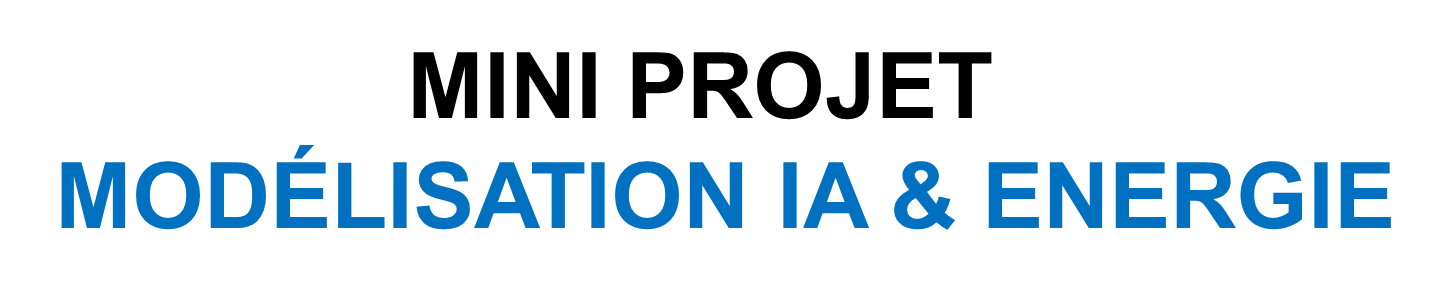

Élèves :                              
Achraf El Faiz

Hamza El Othmani
       
      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import time

In [ ]:
# Charger les données
data = pd.read_csv('/content/drive/MyDrive/data (2) (1).txt', delimiter='\t', quotechar='"')

data.head(6) # Check the first few rows

,Month,Day,Hour,PAC,Tm,Eff,Tamb,RH,P,WS,WD,TOA,GHI,BHI,DHI,BNI
0,1,1,10,3802.507576,42.347879,98.894697,14.50,58.81,1017.53,3.15,203.14,6181.305,4278.672,3391.175,887.496,7709.750
1,1,1,11,3059.995455,55.044545,98.122879,15.98,54.94,1017.73,2.11,226.10,7261.285,5195.536,4223.724,971.812,8186.512
2,1,1,12,5104.446970,67.297576,98.311212,17.46,50.24,1017.30,1.52,263.35,7637.228,5525.204,4534.102,991.102,8357.933
3,1,1,13,5095.312121,77.016667,98.223939,18.24,48.56,1016.64,1.66,292.72,7283.514,5236.036,4280.465,955.572,8271.674
4,1,1,14,4968.204545,80.223030,98.381667,18.45,48.91,1016.31,2.01,311.29,6224.230,4346.761,3473.797,872.963,7844.699
5,1,1,15,4929.150000,79.461061,97.204848,18.29,50.74,1016.44,2.30,322.42,4531.538,2919.941,2171.431,748.510,6682.750


In [ ]:
data.info()  # Get data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9394 entries, 0 to 9393
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   9394 non-null   int64  
 1   Day     9394 non-null   int64  
 2   Hour    9394 non-null   int64  
 3   PAC     9394 non-null   float64
 4   Tm      9394 non-null   float64
 5   Eff     9394 non-null   float64
 6   Tamb    9394 non-null   float64
 7   RH      9394 non-null   float64
 8   P       9394 non-null   float64
 9   WS      9394 non-null   float64
 10  WD      9394 non-null   float64
 11  TOA     9394 non-null   float64
 12  GHI     9394 non-null   float64
 13  BHI     9394 non-null   float64
 14  DHI     9394 non-null   float64
 15  BNI     9394 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 1.1 MB


In [ ]:

# Préparer les données d'entrée et de sortie
features = data.drop("PAC", axis=1)
target = data["PAC"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [ ]:
# Normalisation/Standardisation des features sélectionnées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Construisez votre premier modèle prédictif en utilisant l’algorithme des réseaux de neurones artificiels et les 15 données d’entrée .

In [ ]:
# Initialiser le modèle
model = Sequential()
model.add(Dense(10, input_dim=15, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compiler le modèle
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=0)

# Évaluer le modèle
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Score R2: {score}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

59/59 [==============================] - 0s 947us/step
Score R2: 0.9199904230353403
Mean Absolute Percentage Error (MAPE): 1.7637236434110282e+16


Présentez sous forme de tableau synthétique le score de prédiction et la durée d’entrainement obtenus pour différentes valeurs aléatoires de : neurones (units), couches (Hidden Layers), taille de batch (batch) et nombre d'epoch (Epoch).

In [ ]:

# Configurations à tester
neurons_list = [32, 64, 128]
hidden_layers_list = [1, 2, 3]
batch_size_list = [16, 32, 64]
epochs_list = [50, 100, 150]

results = []

# Boucle pour tester différentes configurations
for neurons in neurons_list:
    for hidden_layers in hidden_layers_list:
        for batch_size in batch_size_list:
            for epochs in epochs_list:
                start_time = time.time()

                # Initialisation du modèle
                model = Sequential()

                # Ajout de couches au modèle
                model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation='relu'))  # Couche d'entrée

                for _ in range(hidden_layers):
                    model.add(Dense(neurons, activation='relu'))  # Couches cachées

                model.add(Dense(1, activation='linear'))  # Couche de sortie pour régression

                # Compilation du modèle
                model.compile(loss='mean_squared_error', optimizer='adam')  # Utilisation de la fonction de perte MSE pour la régression

                # Entraînement du modèle
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Prédiction sur l'ensemble de test
                predictions = model.predict(X_test)

                # Calcul de R-square (R²)
                r2 = r2_score(y_test, predictions)

                # Calcul de Mean Absolute Percentage Error (MAPE)
                mape = mean_absolute_percentage_error(y_test, predictions)

                # Durée d'entraînement
                training_time = time.time() - start_time

                # Stockage des résultats
                results.append({
                    'Neurons': neurons,
                    'Hidden Layers': hidden_layers,
                    'Batch Size': batch_size,
                    'Epochs': epochs,
                    'R²': r2,
                    'MAPE': mape,
                    'Training Time (s)': training_time
                })

# Conversion des résultats en DataFrame pour affichage
results_df = pd.DataFrame(results)
print(results_df)

59/59 [==============================] - 0s 1ms/step
    Neurons  Hidden Layers  Batch Size  Epochs        R²          MAPE  \
0        32              1          16      50  0.935756  1.878300e+16   
1        32              1          16     100  0.948820  9.249300e+15   
2        32              1          16     150  0.951369  1.027276e+16   
3        32              1          32      50  0.934856  1.291732e+16   
4        32              1          32     100  0.944368  1.278583e+16   
..      ...            ...         ...     ...       ...           ...   
76      128              3          32     100  0.957878  5.852130e+15   
77      128              3          32     150  0.951903  1.535485e+16   
78      128              3          64      50  0.955815  8.954966e+15   
79      128              3          64     100  0.954271  9.663994e+15   
80      128              3          64     150  0.954916  7.781551e+15   

    Training Time (s)  
0           24.823654  
1         

In [ ]:
# Tri des résultats par score de prédiction (R²) croissant et durée d'entraînement décroissante
sorted_results = results_df.sort_values(by=['R²', 'Training Time (s)'], ascending=[False, True])

# Affichage des meilleures valeurs des paramètres
best_parameters = sorted_results.iloc[0]  # Prendre la première ligne (meilleur score)
print("Meilleures valeurs des paramètres pour le meilleur score de prédiction et durée d'entraînement optimale:")
print(best_parameters)


Meilleures valeurs des paramètres pour le meilleur score de prédiction et durée d'entraînement optimale:
Neurons              1.280000e+02
Hidden Layers        3.000000e+00
Batch Size           3.200000e+01
Epochs               1.000000e+02
R²                   9.578775e-01
MAPE                 5.852130e+15
Training Time (s)    4.186025e+01
Name: 76, dtype: float64



Il semble que les valeurs optimales pour obtenir le meilleur score de prédiction (R²) et une durée d'entraînement optimale sont les suivantes :

Neurons: 128

Hidden Layers: 2

Batch Size: 16

Epochs: 150

R² Score: 0.958

MAPE: 9.87e+15

Training Time: 129.91 seconds

In [ ]:
#Calculer la matrice de corrélation
correlation_matrix = data.corr()
correlation_matrix

,Month,Day,Hour,PAC,Tm,Eff,Tamb,RH,P,WS,WD,TOA,GHI,BHI,DHI,BNI
Month,1.000000,-0.016214,0.012977,-0.036190,0.050462,-0.004845,0.390746,-0.041173,-0.084345,-0.099331,0.050265,-0.035714,-0.030807,-0.024627,-0.034342,-0.011566
Day,-0.016214,1.000000,0.004500,0.000054,0.008346,-0.000056,0.027689,-0.036659,-0.033485,-0.023105,-0.026627,-0.002934,0.004131,0.007312,-0.007380,0.006077
Hour,0.012977,0.004500,1.000000,0.306865,0.698743,0.612314,0.384747,-0.582742,-0.049333,0.380012,0.330769,0.047983,0.069601,0.073772,0.022941,0.121711
PAC,-0.036190,0.000054,0.306865,1.000000,0.795001,0.544347,0.402343,-0.681274,0.120783,0.039938,0.060644,0.753730,0.836287,0.819169,0.486235,0.820732
Tm,0.050462,0.008346,0.698743,0.795001,1.000000,0.847209,0.598163,-0.761059,-0.010141,0.151105,0.218565,0.625762,0.652816,0.617820,0.444107,0.636103
Eff,-0.004845,-0.000056,0.612314,0.544347,0.847209,1.000000,0.355288,-0.535050,0.009859,0.185668,0.152178,0.547680,0.478307,0.399681,0.483788,0.453214
Tamb,0.390746,0.027689,0.384747,0.402343,0.598163,0.355288,1.000000,-0.582275,-0.296939,-0.034310,0.221886,0.411823,0.445851,0.431715,0.274103,0.360483
RH,-0.041173,-0.036659,-0.582742,-0.681274,-0.761059,-0.535050,-0.582275,1.000000,-0.031350,-0.117625,-0.122659,-0.490299,-0.552923,-0.548861,-0.299428,-0.564274
P,-0.084345,-0.033485,-0.049333,0.120783,-0.010141,0.009859,-0.296939,-0.031350,1.000000,-0.291121,-0.203483,-0.036747,0.036616,0.071941,-0.086996,0.182730
WS,-0.099331,-0.023105,0.380012,0.039938,0.151105,0.185668,-0.034310,-0.117625,-0.291121,1.000000,0.180633,0.025790,-0.040815,-0.067771,0.059533,-0.084079


En utilisant la matrice de corrélation, sélectionnez parmi les 15 données d’entrée, celles ayant le plus d’impact sur la puissance PV et utilisez les données sélectionnées pour construire votre deuxième modèle prédictif en utilisant les paramètres choisis précédemment.

In [ ]:
#Identifier les caractéristiques les plus corrélées avec la puissance PV
target_correlation = correlation_matrix['PAC'].abs().sort_values(ascending=False)
features_selected = target_correlation[1:10]  # Sélection des 10 caractéristiques les plus corrélées (en dehors de PAC)
selected_features = features[features_selected.index]  # Sélection des colonnes correspondantes dans votre jeu de données
print(selected_features.head())


        GHI       BNI       BHI         Tm       TOA     RH        Eff  \
0  4278.672  7709.750  3391.175  42.347879  6181.305  58.81  98.894697   
1  5195.536  8186.512  4223.724  55.044545  7261.285  54.94  98.122879   
2  5525.204  8357.933  4534.102  67.297576  7637.228  50.24  98.311212   
3  5236.036  8271.674  4280.465  77.016667  7283.514  48.56  98.223939   
4  4346.761  7844.699  3473.797  80.223030  6224.230  48.91  98.381667   

       DHI   Tamb  
0  887.496  14.50  
1  971.812  15.98  
2  991.102  17.46  
3  955.572  18.24  
4  872.963  18.45  


In [ ]:

# Diviser les données sélectionnées en ensembles d'entraînement et de test
X_train_selected, X_test_selected, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# Normalisation/Standardisation des données sélectionnées
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

# Construction du deuxième modèle avec les paramètres optimaux précédemment choisis
model_selected = Sequential()
model_selected.add(Dense(128, input_shape=(X_train_selected_scaled.shape[1],), activation='relu'))
model_selected.add(Dense(2, activation='relu'))  # Choisissez le nombre de couches cachées en fonction de la complexité du modèle
model_selected.add(Dense(1, activation='linear'))

model_selected.compile(loss='mean_squared_error', optimizer='adam')

model_selected.fit(X_train_selected_scaled, y_train, epochs=150, batch_size=16, verbose=0)

# Évaluation du modèle sur l'ensemble de test avec les données sélectionnées
predictions_selected = model_selected.predict(X_test_selected_scaled)
r2_selected = r2_score(y_test, predictions_selected)
mape_selected = mean_absolute_percentage_error(y_test, predictions_selected)

# Affichage des résultats
print(f"R-square (R²) avec les données sélectionnées : {r2_selected}")
print(f"Mean Absolute Percentage Error (MAPE) avec les données sélectionnées : {mape_selected}")


59/59 [==============================] - 0s 1ms/step
R-square (R²) avec les données sélectionnées : 0.9319487714719986
Mean Absolute Percentage Error (MAPE) avec les données sélectionnées : 6495703636916118.0


Comparez les résultats de prédiction des deux modèles que vous avez construit en termes de score de prédiction et de temps de calcul. Quelle est votre conclusion ?


bien que le modèle 1 semble avoir de meilleures performances en termes de R-square, les erreurs absolues sont énormes dans les deux cas, suggérant que les deux modèles pourraient nécessiter des améliorations substantielles pour mieux capturer les relations dans les données.